# Detection and segmentation of multiple modules

This is a quick tutorial showcasing the detection of multiple modules.

## Preparation

Enable auto completion and import reqired packages:

In [2]:
%config IPCompleter.greedy=True

In [3]:
from pvinspect.data import datasets, Image
from pvinspect.preproc import locate_multiple_modules
from pvinspect.data.io import save_image
import numpy as np

## Data

Import our favourite sequence of test images:

In [4]:
data = datasets.poly10x6(N=5)

100%|██████████| 5/5 [00:00<00:00, 102.01it/s]


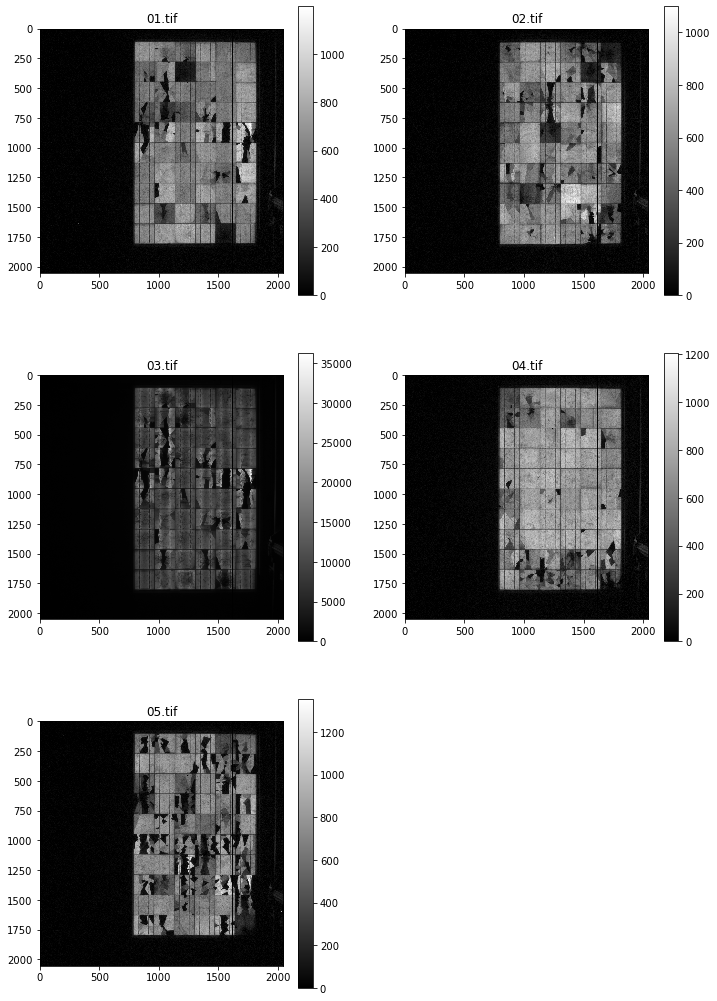

In [5]:
data.head(N=5)

Unfortunately, this sequence has only single module images. But for demonstration purposes, we can concatenate some of them to obtain an image with four modules. We skip ``data[2]``, since this one has a very different range of photon counts, which makes visualization hard.

In [6]:
data_multi = Image.from_other(data[0], data=np.concatenate((
    np.concatenate((data[0].data, data[1].data), axis=1),
    np.concatenate((data[3].data, data[4].data), axis=1),
), axis=0))

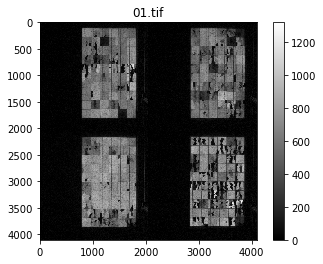

In [7]:
data_multi.show()

## Detection and segmentation

Now, we can locate the modules in our artificial multi-module image. This method has many options, but the default ones should work for most use cases:

In [8]:
modules = locate_multiple_modules(data_multi)

100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


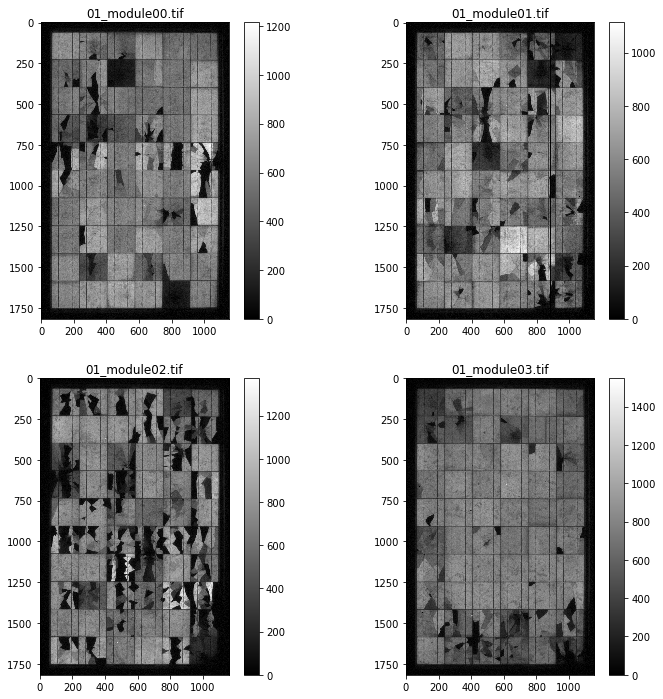

In [9]:
modules.head(N=4)

## Visualization

Most likely, we want to know, which one from the original image is ``module00``, ``module01`` and so on. Luckily, we have a meta attribute ``multimodule_original`` referring to the original image with annotations:

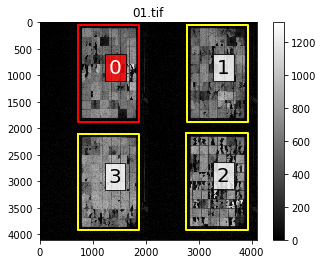

In [10]:
modules[0].get_meta('multimodule_original').show()

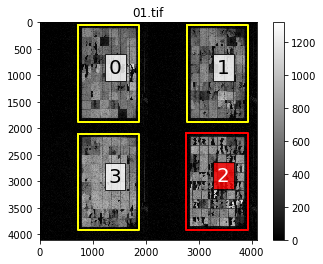

In [11]:
modules[2].get_meta('multimodule_original').show()

We can even control what is visualized:

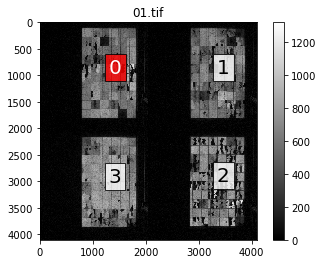

In [12]:
modules[0].get_meta('multimodule_original').show(multimodule_show_boxes=False)

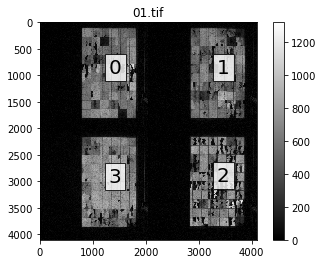

In [13]:
modules[0].get_meta('multimodule_original').show(multimodule_show_boxes=False, multimodule_highlight_selection=False)

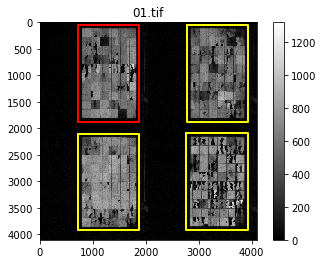

In [14]:
modules[0].get_meta('multimodule_original').show(multimodule_show_numbers=False)

## Save visualization to file

We can also save the visualization to a file for further inspection. We have many options to control what is shown in the output. Most of them should be self-explanatory. However, the last two (``bbox_inches='tight'`` and ``pad_inches=0``) make sure that there is no white padding around the saved image.

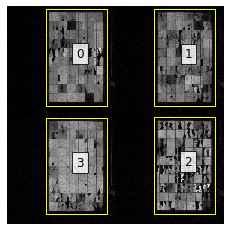

In [15]:
save_image('original.pdf', modules[0].get_meta('multimodule_original'), with_visusalization=True, multimodule_highlight_selection=False, dpi=300, multimodule_boxes_linewidth=1, multimodule_numbers_fontsize=12, show_axis=False, show_title=False, colorbar=False, bbox_inches='tight', pad_inches=0)